# `20180403b` - processing side  - version p

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.interpolate import griddata
import math
from scipy.signal import decimate, convolve

import re
import glob, os

## Creating the set of acquisitions

p_VGA-lin_0to1000_25V-200us-0-200_100_2000_10_200000-64msps.csv
first


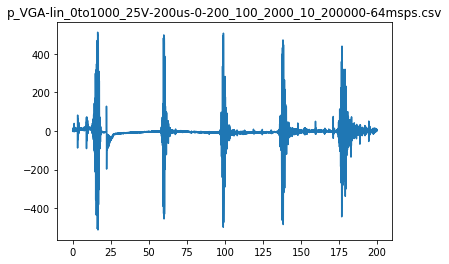

p_VGA2-lin_200to200_25V-200us-2-200_100_2000_10_200000-64msps.csv
first


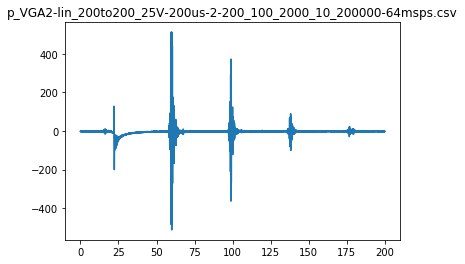

p_VGA2-lin_600to600_25V-200us-3-200_100_2000_10_200000-64msps.csv
first


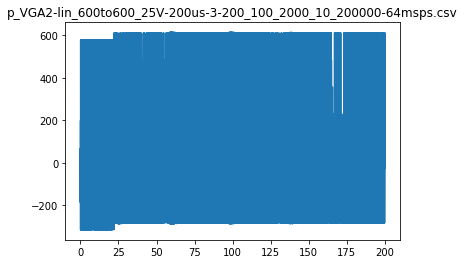

p_VGA2-exp_0to1000_25V-200us-0-200_100_2000_10_200000-64msps.csv
first


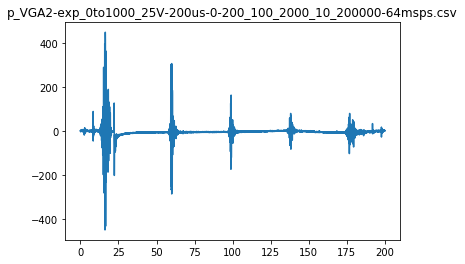

p_VGA2-lin_0to1000_25V-200us-1-200_100_2000_10_200000-64msps.csv
second


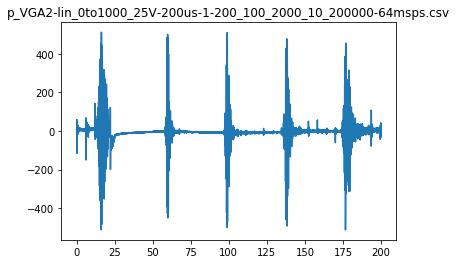

In [3]:
AA = []
lbl = []
IDLine = []

for CSVFile in glob.glob("p_VGA*.csv"):
    print CSVFile
    A = np.genfromtxt(CSVFile, delimiter=';').astype(int)[1:]
    tmp = [] 
    N = len(A)
    FF = CSVFile.split(".")[0].split("-")[-1]
    lbl.append(  CSVFile.split("-")[2] )
    f = int(re.sub('[^0-9]','', FF))
    #F = int(CSVFile.split(".")[0])

    if (A[4]) > 0b111:
        print "first"
        for i in range(len(A)/2-1):
            value = 128*(A[2*i+0]&0b111) + A[2*i+1] - 512
            IDLine.append((A[2*i+1]&0b11110000)/16) # Identify the # of the line
            tmp.append( value ) 
    else:
        print "second"
        for i in range(len(A)/2-1):
            value = 128*(A[2*i+1]&0b111) + A[2*i+2] - 512
            IDLine.append((A[2*i+1]&0b11110000)/16)
            #print A[2*i]&0b10000000,A[2*i+1]&0b10000000,
            tmp.append( value )
            #print A[2*i+1]
            #print A[i+1]-A[i] 
            
    #t = t*1.0/f
    t = [ 1.0*x/f for x in range(len(tmp))]
    plt.plot(t,tmp)
    plt.title(CSVFile)
    plt.savefig(CSVFile.split(".")[0].split("/")[-1]+".jpg")
    plt.show()
    
    AA.append(tmp)
    




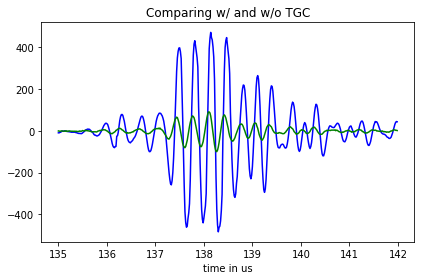

In [20]:
stt = 135*64
stp = 142 * 64
plt.title('Comparing w/ and w/o TGC')
plt.plot(t[stt:stp],AA[0][stt:stp],"b")
plt.plot(t[stt:stp],AA[1][stt:stp],"g")
plt.xlabel('time in us')
plt.tight_layout()
plt.savefig("TGCdetail.jpg")
plt.show()

# Plotting two TGC echoes side by side

__TGC used is linear from 0us to 200us, and 0 to 1V__

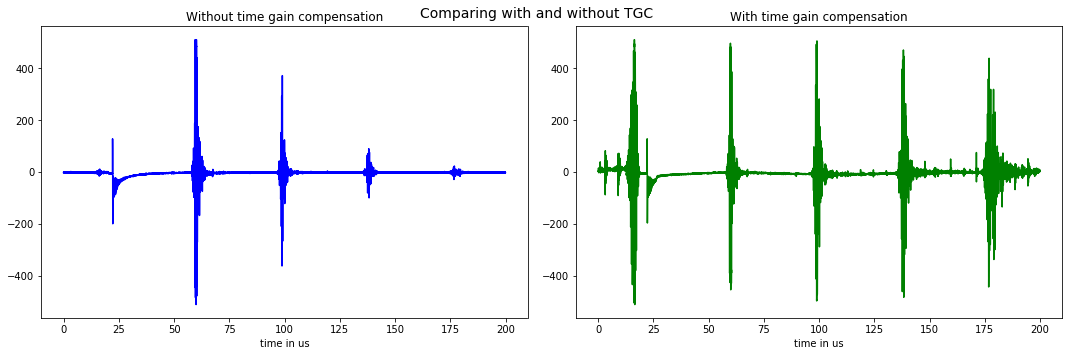

In [14]:
stt = 0
stp = len(AA[1])

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(t[stt:stp],AA[1][stt:stp],"b")
plt.title('Without time gain compensation')
plt.xlabel('time in us')

plt.subplot(1, 2, 2)
plt.plot(t[stt:stp],AA[0][stt:stp],"g")
plt.title('With time gain compensation')
plt.xlabel('time in us')
plt.suptitle("Comparing with and without TGC", fontsize=14)
plt.tight_layout()
plt.savefig("TGC.jpg")
plt.show()